# Assessment 2 : Data Processing

Prepared by: Ray McGregor

# Import Libaries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import Normalizer

import random

import matplotlib.pyplot as plt

import dataframe_image as dfi


# Read and Clean Data

In [2]:
input_df = pd.read_csv('C:/Dropbox/Variance/UNSW/ZZSC5836/raw_data/abalone.data', header=None)
input_df.columns = ["Sex","Length", "Diameter", "Height", "Whole Weight", "Shucked weight", "Viscera Weight", "Shell Weight", "Rings"]

# Task 1: Convert M, F and I to 0, 1 and 
input_df['Sex'] = input_df['Sex'].replace({"M": 0, "F": 1, "I": 2})

input_df



,Sex,Length,Diameter,Height,Whole Weight,Shucked weight,Viscera Weight,Shell Weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# Task 1.2 Correlation Heat Map

Lets first create a correlation matrix and display the results in tabular format.

In [3]:
corr_matrix = input_df.corr()
corr_matrix

,Sex,Length,Diameter,Height,Whole Weight,Shucked weight,Viscera Weight,Shell Weight,Rings
Sex,1.000000,-0.448765,-0.458245,-0.417928,-0.461238,-0.440927,-0.454658,-0.445549,-0.351822
Length,-0.448765,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.458245,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.417928,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole Weight,-0.461238,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.440927,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera Weight,-0.454658,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell Weight,-0.445549,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.351822,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


Lets isolate the correlation levels of the factors with Rings.

In [4]:
corr_rings = corr_matrix['Rings'].sort_values(ascending=False)
print('The correlation of Rings with other variables\n')
print(corr_rings[1:])


The correlation of Rings with other variables

Shell Weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole Weight      0.540390
Viscera Weight    0.503819
Shucked weight    0.420884
Sex              -0.351822
Name: Rings, dtype: float64


## Create a Heatmap

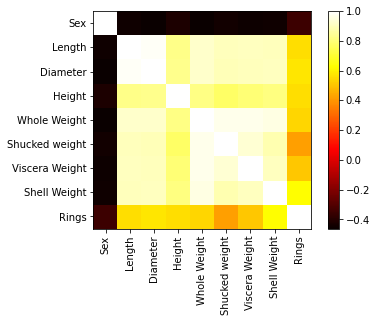

<Figure size 432x288 with 0 Axes>

In [5]:
plt.imshow(corr_matrix, cmap='hot') 
plt.colorbar()
#plt.xticks(range(input_df.shape[1]), input_df.columns, fontsize=12, rotation=90)
#plt.yticks(range(input_df.shape[1]), input_df.columns, fontsize=12)
plt.xticks(range(input_df.shape[1]), input_df.columns, rotation=90)
plt.yticks(range(input_df.shape[1]), input_df.columns)

plt.show()
plt.savefig('C:/Dropbox/Variance/UNSW/ZZSC5836/heatmap.png')

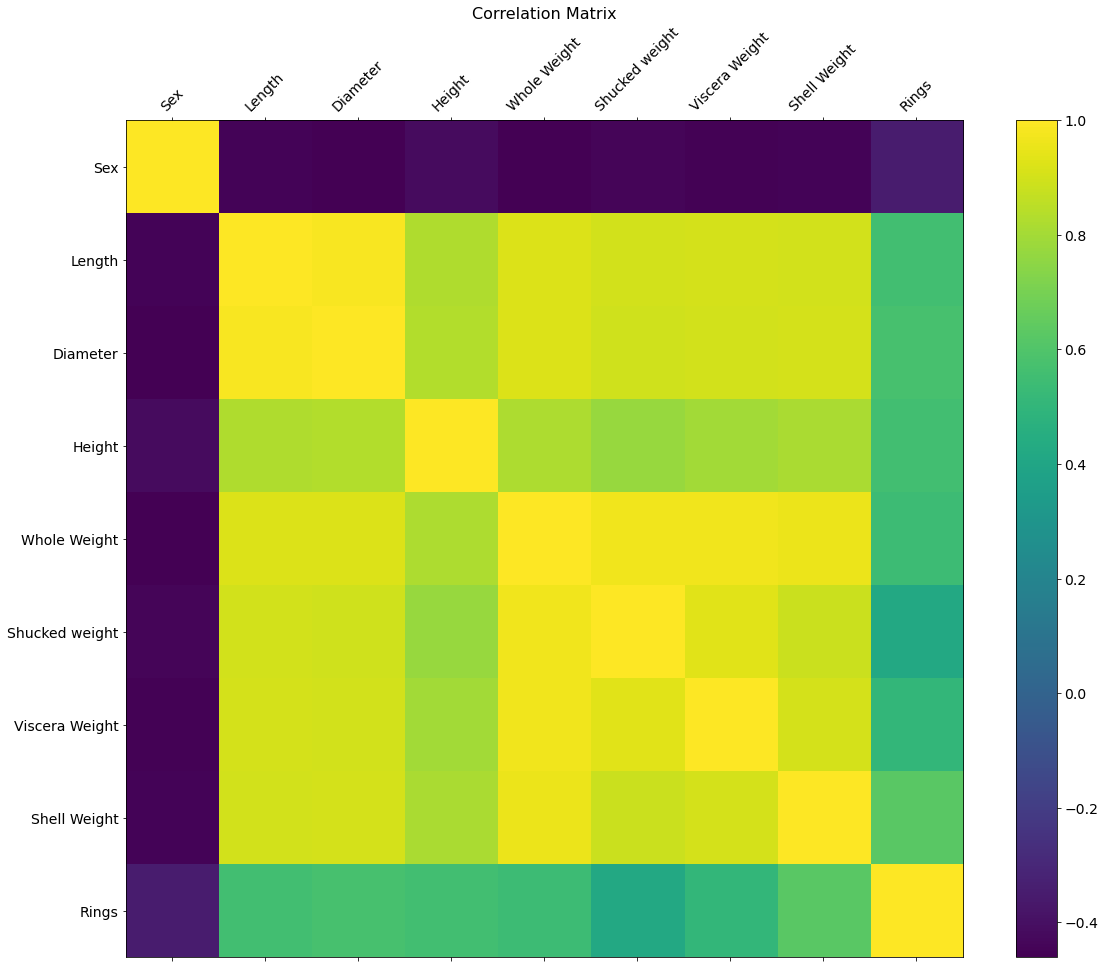

In [6]:
# https://stackoverflow.com/questions/53908351/heat-map-for-correlation-in-python

f = plt.figure(figsize=(19, 15))
plt.matshow(corr_matrix, fignum=f.number)
plt.xticks(range(input_df.shape[1]), input_df.columns, fontsize=14,rotation=45)
plt.yticks(range(input_df.shape[1]), input_df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

## Observations From Correlations

- Sex is negatively correlated with all the other factors, including our target variable Rings.  Sex is the only factor which has negative correlations to any other factor.

- The factor which is most strongly correlated with our target variable Rings is Shell Weight.

- All the factors show some level of correlation as even the factor with the lowest level of correlation (Sex) has an absolute correlation level of 0.3518.

- The correlation levels between the Height and Length with Rings is almost identical which may mean they are overlapping factors.  This seems to be supported by the correlation level between the being high at 0.827.

- There is a very strong correlation between several of the factors which needs to be taken into account when building our model.  We've displayed those within a dataframe. 

In [7]:
# Build a Datframe highlighting those variables with high cross correlation

very_high_cross_correlations = corr_matrix[(corr_matrix>0.95) & (corr_matrix<1)]
very_high_cross_correlations = very_high_cross_correlations.unstack().to_dict()
high_cross_corr_dict = {}
for key, value in very_high_cross_correlations.items():
    # if the value is nan, then delete from dictionary
    if abs(value) > 0:
        high_cross_corr_dict[key] = value

# insert high_cross_corr_dict into a dataframe
high_cross_corr_df = pd.DataFrame.from_dict(high_cross_corr_dict, orient='index', columns=['Correlation'])

 
dfi.export(high_cross_corr_df, 'high_cross_corr_df.png')

print("Factors with high cross correlation:")
high_cross_corr_df



Factors with high cross correlation:


,Correlation
"(Length, Diameter)",0.986812
"(Diameter, Length)",0.986812
"(Whole Weight, Shucked weight)",0.969405
"(Whole Weight, Viscera Weight)",0.966375
"(Whole Weight, Shell Weight)",0.955355
"(Shucked weight, Whole Weight)",0.969405
"(Viscera Weight, Whole Weight)",0.966375
"(Shell Weight, Whole Weight)",0.955355


## 1.3 Scatter Plot

The two factors with highest correlation to Rings are Shell Weight and Diameter.


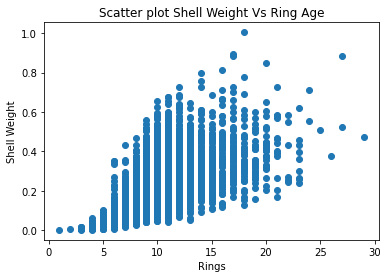

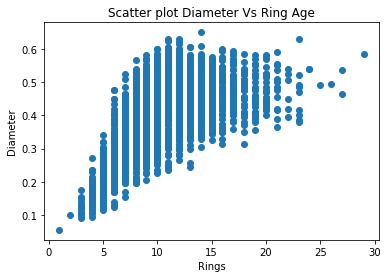

Rings             1.000000
Shell Weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole Weight      0.540390
Viscera Weight    0.503819
Shucked weight    0.420884
Sex              -0.351822
Name: Rings, dtype: float64

In [8]:
print(f"The two factors with highest correlation to Rings are {corr_rings.index[1]} and {corr_rings.index[2]}.")

for i in [1,2]:
    # Create a scatter plot of the two factors with highest correlation to Rings
    plt.scatter(input_df[corr_rings.index[0]], input_df[corr_rings.index[i]])

    plt.title(f"Scatter plot {corr_rings.index[i]} Vs Ring Age")
    plt.xlabel(corr_rings.index[0])
    plt.ylabel(corr_rings.index[i])
    plt.show()
    #plt.savefig()

corr_rings


### Observations From Scatter Plots

1. Both plots indicate a definite trend of Diameter and Shell Weight increasing as the number of rings increase.  This is consistent with the relatively strong positive numerical correlation value.  Visually, the strength of that relationship is not obviously different between the two factors which again is consistent with the numerical correlation values of (0.63 and 0.57) being relatively close.

2. The scatter plots show signficantly fewer values for Rings > 6 and < 22.5 which is obvious enough to warrant investigation into why this is the case.  Is it something to do with our specific sample, or is it representative of the entire population and for both instances, why?

3.  Most of the 'outliers' shown in the graph appear to be related to the age of the sample item (low number of rings or high number of rings) but consistent with the positive correlation noted.  That is, while there are some 'outliers' in they have a number of rings above 25, or less than 4, the values for those outliers do generally seem to follow the correlation patter for the overall population.  While the impact of outliers should still be considered, the plots shown seem to indicate that the outliers will impact on our models less than other populations with more extreme outliers.

4.  The distribution of the Diameter plot differs in shape from the distribution of the Shell Weight plot.  Distribution shape is important for several reasons, including that it often relevant when applying prediciton models as many of the prediction models make assumptions about the nature of the distribution of the underlying data set.

5.  There is a not a large disparity between the sbsolute values of the two factors plotted.  That is, the maximum value for both Diameter and Shell Weight is less than one and there are are no negative values.  So the range of values for both factors is between 0 and 1 (which may indicate the values have already been normalized).  

## 1.4 Histograms

In [9]:
input_df['Shell Weight']

0       0.1500
1       0.0700
2       0.2100
3       0.1550
4       0.0550
         ...  
4172    0.2490
4173    0.2605
4174    0.3080
4175    0.2960
4176    0.4950
Name: Shell Weight, Length: 4177, dtype: float64

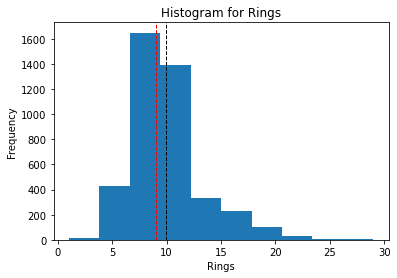

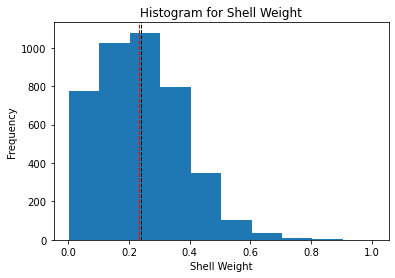

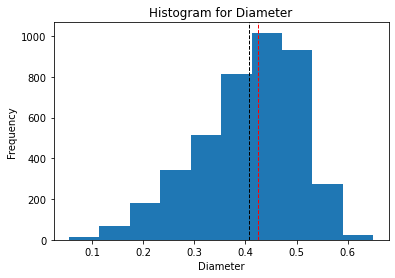

Rings             1.000000
Shell Weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole Weight      0.540390
Viscera Weight    0.503819
Shucked weight    0.420884
Sex              -0.351822
Name: Rings, dtype: float64

In [10]:
for i in [0, 1,2]:
    # Create a histogram plot of the two factors with highest correlation to Rings
    plt.hist(input_df[corr_rings.index[i]])

    plt.title(f"Histogram for {corr_rings.index[i]}")
    plt.xlabel(corr_rings.index[i])
    plt.ylabel("Frequency")
    plt.axvline(input_df[corr_rings.index[i]].mean(), color='k', linestyle='dashed', linewidth=1) # Mean
    plt.axvline(input_df[corr_rings.index[i]].median(), color='r', linestyle='dashed', linewidth=1) # Median

    plt.show()
    #plt.savefig()

corr_rings

### Histogram Observations

1.  The three population values appear to have quite different distribution shapes. None of the three appear to be normally distributed but all three share some characteristics of a normal distribution with the highest frequencies being central to the distribution and then then tailing off to the higher and lower values.  However, the 'tails' of the distribution are not as symmetrical as you would expect to see for a normal distribution.

2.  All three populations show a large percentage of values within relatively narrow range.  This is especially true for Rings and Shell Weight and a little less so for Diameter which does show a more stepped frequency leading up the median frequency.



# 1.5 Create a 60/ 40 Train Test Split

In [11]:
def generate_data(source_df, exp_num, test_size = 0.4):

    x_train, x_test = train_test_split(source_df.values[:,:-1], test_size=test_size, random_state=exp_num)
    y_train, y_test = train_test_split(source_df.values[:,-1], test_size=test_size, random_state=exp_num)

    return x_train, x_test, y_train, y_test

In [25]:
## Sample Run of Train Test Split Function
experiment_num = 2
print(f"Experiment Number: {experiment_num}")

# Run Function to generate train and test data: Using all factors and a 60/40 Train Test Split and Not Normalized
x_train, x_test, y_train, y_test = generate_data(input_df, experiment_num, test_size = 0.4)

# Print first two records of each set
print('X_train: ', x_train[:1])
print('Y_train: ', y_train[:1])
print('X_test: ', x_test[:1])
print('Y_test: ', y_test[:1]) 

Experiment Number: 2
X_train:  [[0.     0.375  0.28   0.095  0.2225 0.0875 0.043  0.08  ]]
Y_train:  [10.]
X_test:  [[1.     0.46   0.38   0.13   0.639  0.3    0.1525 0.16  ]]
Y_test:  [11.]


# PART TWO : MODELLING

## 2.1 Linear Regression Model

In [13]:
def scipy_linear_mod(x_train, x_test, y_train, y_test):
    #Source: Scikit Learn. (n.d). Linear Regression Example. https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html 

    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(x_train, y_train)

    # Make predictions using the testing set
    y_pred_train = regr.predict(x_train)
    y_pred_test = regr.predict(x_test)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    r2_train = r2_score(y_train, y_pred_train)

    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2_test = r2_score(y_test, y_pred_test)

    return rmse_train, r2_train, rmse_test, r2_test, y_pred_test



In [14]:
# Source: Exercise 1.2 Solution
def run_lin_regression_experiments(variation_df, normalization = False): 
 
    max_exp = 5

    rmse_train_list = np.zeros(max_exp)
    rsq_train_list = np.zeros(max_exp)
    rmse_test_list = np.zeros(max_exp)
    rsq_test_list = np.zeros(max_exp)
    
    print(f"Factors: {list(variation_df.columns[:-1])} | Normalization: {normalization}\n")

    for exp_num in range(max_exp):

        #Generate Train Test Using All Factors, Without Normalization
        x_train, x_test, y_train, y_test = generate_data(variation_df, exp_num, test_size = 0.4)

        # normalize training sets if required
        if normalization:
            normalizer = Normalizer()
            x_train = normalizer.fit_transform(x_train)
            x_test = normalizer.transform(x_test)

        # Run Closed End Linear Regression Model
        rmse_train, r2_train, rmse_test, r2_test, y_pred_test = scipy_linear_mod(x_train, x_test, y_train, y_test)
        
        rmse_train_list[exp_num] = rmse_train
        rsq_train_list[exp_num] = r2_train
        rmse_test_list[exp_num] = rmse_test
        rsq_test_list[exp_num] = r2_test

    
    mean_rmse_train = np.mean(rmse_train_list)
    std_rmse_train = np.std(rmse_train_list)
    mean_rsq_train = np.mean(rsq_train_list)
    std_rsq_train = np.std(rsq_train_list)

    mean_rmse_test = np.mean(rmse_test_list)
    std_rmse_test = np.std(rmse_test_list)
    mean_rsq_test = np.mean(rsq_test_list)
    std_rsq_test = np.std(rsq_test_list)    

    print("Training RMSE Scores For Each Experiment")
    print(rmse_train_list)
    print(f"{mean_rmse_train=}, {std_rmse_train=}")

    print("Test RMSE Scores for Each Experiment")
    print(rmse_test_list)
    print(f"{mean_rmse_test=}, {std_rmse_test=}")

    print()

    print("Training R2 Scores for Each Experiment")
    print(rsq_train_list)
    print(f"{mean_rsq_train}=, {std_rsq_train=}")

    print("Test R2 Scores for Each Experiment")
    print(rsq_test_list)
    print(f"{mean_rsq_test=}, {std_rsq_test=}")
    
    results_dict = {"mean_rmse_train": mean_rmse_train, "mean_rmse_test": mean_rmse_test, 
                    "std_rmse_train": std_rmse_train, "std_rmse_test": std_rmse_test, 
                    "mean_rsq_train": mean_rsq_train, "mean_rsq_test": mean_rsq_test, 
                    "std_rsq_train": std_rsq_train, "std_rsq_test": std_rsq_test, 
                    "y_pred_test": y_pred_test}
    
    results_array = list(results_dict.values())[:-1] # Will use to create our comparison df

    return results_dict, results_array



## 2.2 All Features, No Normalization

In [15]:
# Run For All Factors, No Normalisation
results_dict, results_array = run_lin_regression_experiments(input_df, normalization = False)

# Create a dataframe from results_array to store the results
comparison_df = pd.DataFrame(data=[results_array], columns = list(results_dict.keys())[:-1])
comparison_df.index = ['All Factors, No Normalization']

Factors: ['Sex', 'Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked weight', 'Viscera Weight', 'Shell Weight'] | Normalization: False

Training RMSE Scores For Each Experiment
[2.18293545 2.17533221 2.1311203  2.20251027 2.18960523]
mean_rmse_train=2.176300693681332, std_rmse_train=0.02429065231953934
Test RMSE Scores for Each Experiment
[2.22567501 2.27174306 2.31204708 2.26078138 2.21451902]
mean_rmse_test=2.2569531106907514, std_rmse_test=0.03477848704532299

Training R2 Scores for Each Experiment
[0.54377897 0.54751059 0.53792867 0.55021238 0.55402279]
0.5466906801410895=, std_rsq_train=0.005515165740627715
Test R2 Scores for Each Experiment
[0.51952324 0.49867345 0.52423387 0.47859897 0.50242148]
mean_rsq_test=0.5046902030254239, std_rsq_test=0.016273134672369433


## Qustion 2.2: All Features, With Normalization

In [16]:
# Run For All Factors, With Normalisation
results_dict, results_array = run_lin_regression_experiments(input_df, normalization = True)
# Add results to comparison df
comparison_df.loc["All Factors, With Normalization", :] = results_array

Factors: ['Sex', 'Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked weight', 'Viscera Weight', 'Shell Weight'] | Normalization: True

Training RMSE Scores For Each Experiment
[2.16019038 2.15544977 2.09491359 2.18768002 2.16243574]
mean_rmse_train=2.152133900212072, std_rmse_train=0.030723672400854943
Test RMSE Scores for Each Experiment
[2.17446924 2.18501183 2.26776421 2.14475909 2.17099548]
mean_rmse_test=2.1885999698008765, std_rmse_test=0.041740795625430094

Training R2 Scores for Each Experiment
[0.55323662 0.55574426 0.55349604 0.55624913 0.56502185]
0.5567495791361804=, std_rsq_train=0.004303902992625846
Test R2 Scores for Each Experiment
[0.54137743 0.53622229 0.54228413 0.5307419  0.52178782]
mean_rsq_test=0.5344827146465302, std_rsq_test=0.007570726719482361


## Question 2.3: Two Features, No Normalization

In [17]:
# Run For Two Factors, No Normalisation 2.3
results_dict, results_array = run_lin_regression_experiments(input_df[['Shell Weight', 'Diameter', input_df.columns[-1]]], normalization = False)
# Add Results to Comparison DF
comparison_df.loc["Shell Weight & Diameter, No Normalization", :] = results_array

Factors: ['Shell Weight', 'Diameter'] | Normalization: False

Training RMSE Scores For Each Experiment
[2.49504554 2.49534325 2.47504379 2.52875987 2.49470605]
mean_rmse_train=2.497779698718713, std_rmse_train=0.017317920036893933
Test RMSE Scores for Each Experiment
[2.53302705 2.53096374 2.56505753 2.48332211 2.53471775]
mean_rmse_test=2.5294176378654902, std_rmse_test=0.02622406912627316

Training R2 Scores for Each Experiment
[0.40399423 0.40458767 0.37675491 0.40709271 0.42107836]
0.4027015751448464=, std_rsq_train=0.014390593238621395
Test R2 Scores for Each Experiment
[0.37765881 0.37773679 0.414409   0.3708983  0.34812848]
mean_rsq_test=0.3777662751743735, std_rsq_test=0.021299154123964287


## Comparing Results of Different Variations

In [18]:
comparison_df

,mean_rmse_train,mean_rmse_test,std_rmse_train,std_rmse_test,mean_rsq_train,mean_rsq_test,std_rsq_train,std_rsq_test
"All Factors, No Normalization",2.176301,2.256953,0.024291,0.034778,0.546691,0.504690,0.005515,0.016273
"All Factors, With Normalization",2.152134,2.188600,0.030724,0.041741,0.556750,0.534483,0.004304,0.007571
"Shell Weight & Diameter, No Normalization",2.497780,2.529418,0.017318,0.026224,0.402702,0.377766,0.014391,0.021299


In [19]:
BREAK

NameError: name 'BREAK' is not defined

In [ ]:
def mse(true, pred, n):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: mean square error loss
    """
    
    return np.sum((true - pred)**2)/n


#def plot_loss_vs_predictions(y_test, y_pred):
def plot_loss_vs_predictions():
    """
        Function to plot loss vs number of predictions
        Done for a single experiment
    """

    fig, ax1 = plt.subplots(1,1, figsize = (7,5))

    # array of same target value 10000 times
    target = np.repeat(100, 10000) 
    pred = np.arange(-10000,10000, 2)

    loss = [mse(target[i], pred[i], len(pred)) for i in range(len(pred))]

    # plot 
    ax1.plot(pred, loss)
    ax1.set_xlabel('Predictions')
    ax1.set_ylabel('Loss')
    ax1.set_title("MSE Loss vs. Predictions")

    fig.tight_layout()
    

In [ ]:
print(len(y_test))
print(y_test)
print(len(y_pred))
print(y_pred)

1671
[ 8. 10.  8. ...  7. 11.  7.]
1671
[ 8.34312592  9.19195369 11.02034165 ...  9.67862475  9.48856707
  7.61830715]


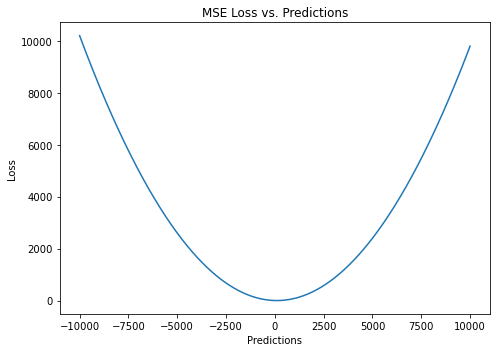

In [ ]:
plot_loss_vs_predictions()

In [ ]:

print(np.repeat(100, 10000) )
print(np.arange(-10000,10000, 2))

[100 100 100 ... 100 100 100]
[-10000  -9998  -9996 ...   9994   9996   9998]
